<a href="https://colab.research.google.com/github/KaduMelo/machine-learning/blob/algoritmo_nao_supervisionado/filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
uri_filmes = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
filmes = pd.read_csv(uri_filmes)

filmes.columns = ['filmes_id', 'titulos', 'generos']

filmes.head()

,filmes_id,titulos,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
generos = filmes.generos.str.get_dummies()
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filmes_id,titulos,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)

generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [5]:
from sklearn.cluster import KMeans

In [6]:
modelo = KMeans(n_clusters=3)
modelo.fit(generos_escalados)

print(f"Grupos {modelo.labels_}")

Grupos [0 0 1 ... 1 0 1]


In [7]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.14172381  1.11468076  1.92882407  2.10385876  0.15598483
  -0.32219777 -0.20002647 -0.59940919  1.21602019 -0.09492563 -0.26768477
   0.30942787  0.30983497 -0.13053366 -0.27361542  0.14179336 -0.47064101
  -0.16932323 -0.0901574 ]
 [ 0.03385395 -0.2512175  -0.20628319 -0.25202356 -0.26917061  0.20315574
  -0.1668571   0.12052977  0.14925246 -0.16630342 -0.07777299 -0.1590046
  -0.10667939  0.015554   -0.18825998  0.17385846 -0.23518632 -0.48310391
   0.0748282   0.04073867]
 [-0.05917995  0.57349447  0.02000165 -0.23165559 -0.26720145 -0.58599811
   0.5689589  -0.21551752 -0.10801359 -0.12722686  0.24023842  0.52440942
   0.13095546 -0.17941692  0.53670177 -0.31760978  0.53278115  1.43853888
  

In [8]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.141724,1.114681,1.928824,2.103859,0.155985,-0.322198,-0.200026,-0.599409,1.216020,-0.094926,-0.267685,0.309428,0.309835,-0.130534,-0.273615,0.141793,-0.470641,-0.169323,-0.090157
1,0.033854,-0.251218,-0.206283,-0.252024,-0.269171,0.203156,-0.166857,0.120530,0.149252,-0.166303,-0.077773,-0.159005,-0.106679,0.015554,-0.188260,0.173858,-0.235186,-0.483104,0.074828,0.040739
2,-0.059180,0.573494,0.020002,-0.231656,-0.267201,-0.585998,0.568959,-0.215518,-0.108014,-0.127227,0.240238,0.524409,0.130955,-0.179417,0.536702,-0.317610,0.532781,1.438539,-0.113410,-0.062659


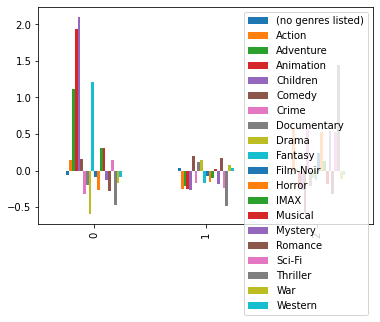

In [9]:
grupos.plot.bar()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b94be2978>,
      dtype=object)

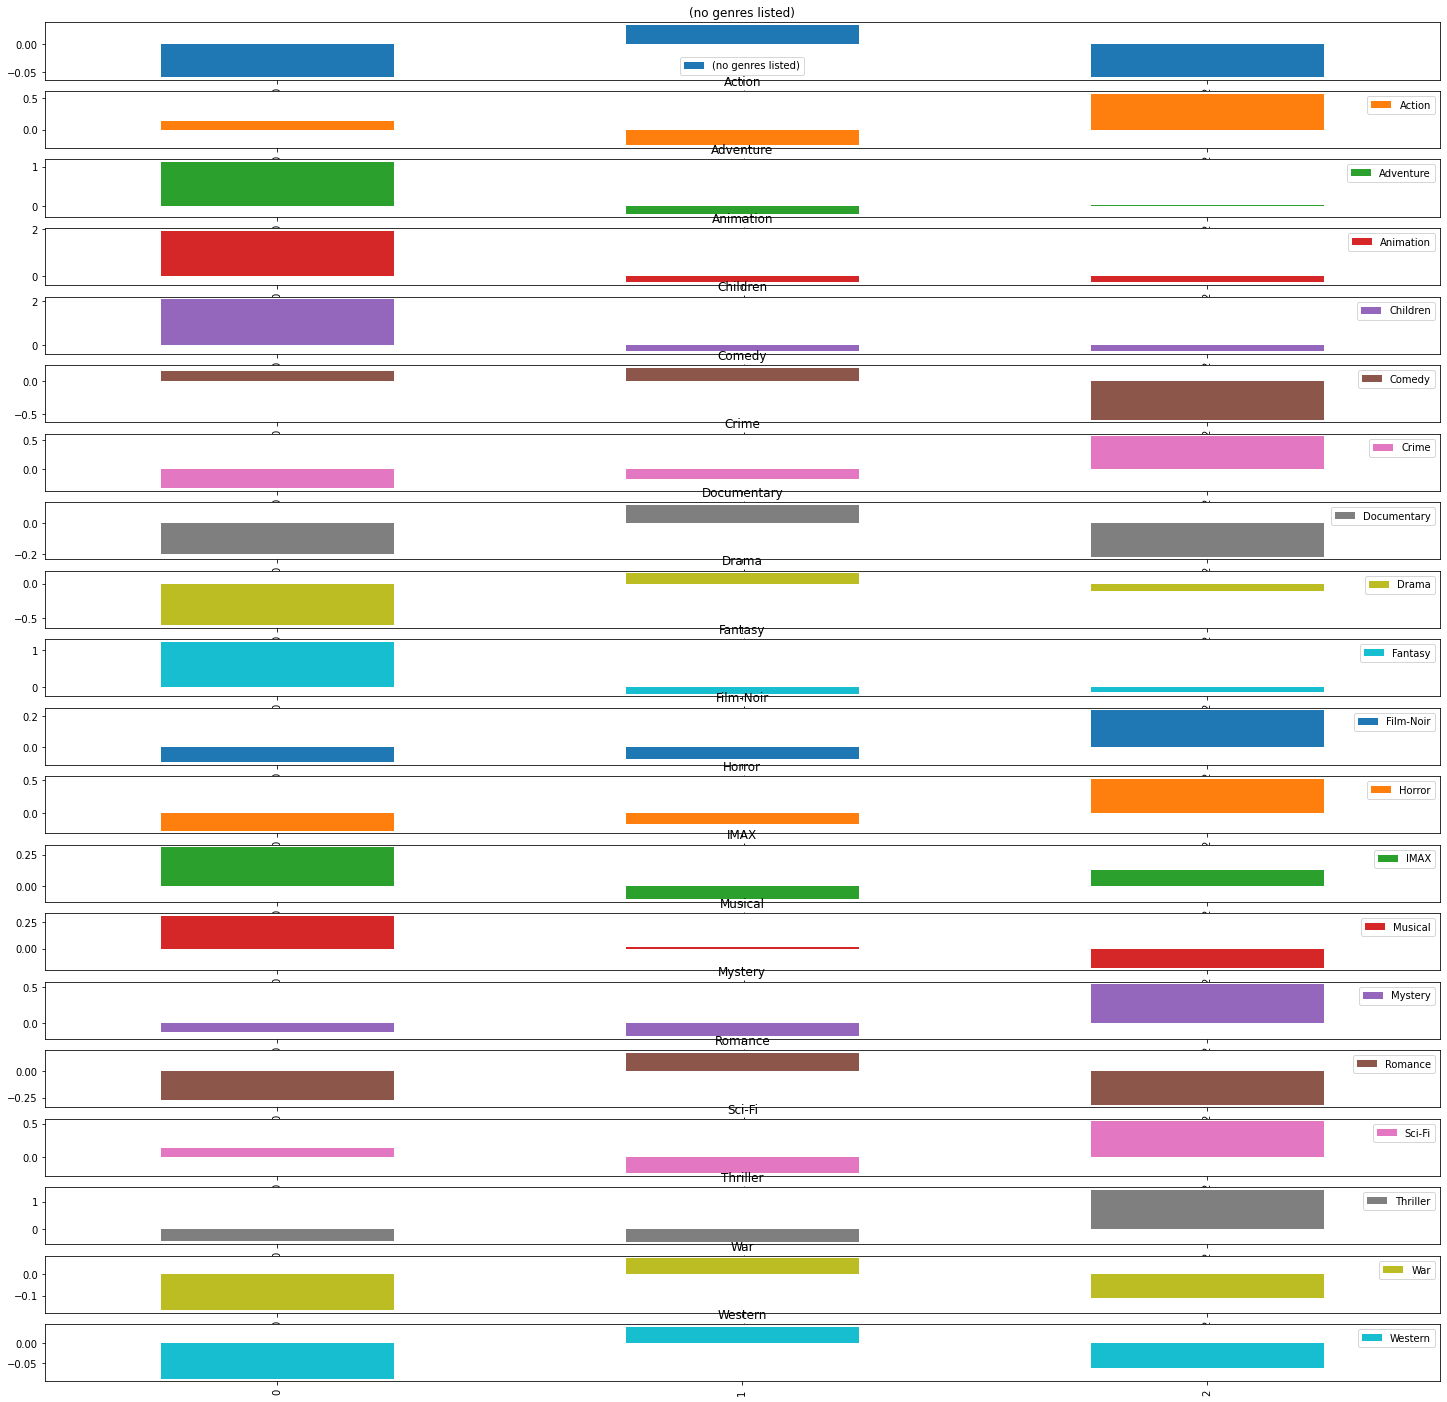

In [10]:
grupos.plot.bar(subplots=True, 
                figsize=(25, 25),
                sharex=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b940e9dd8>,
      dtype=object)

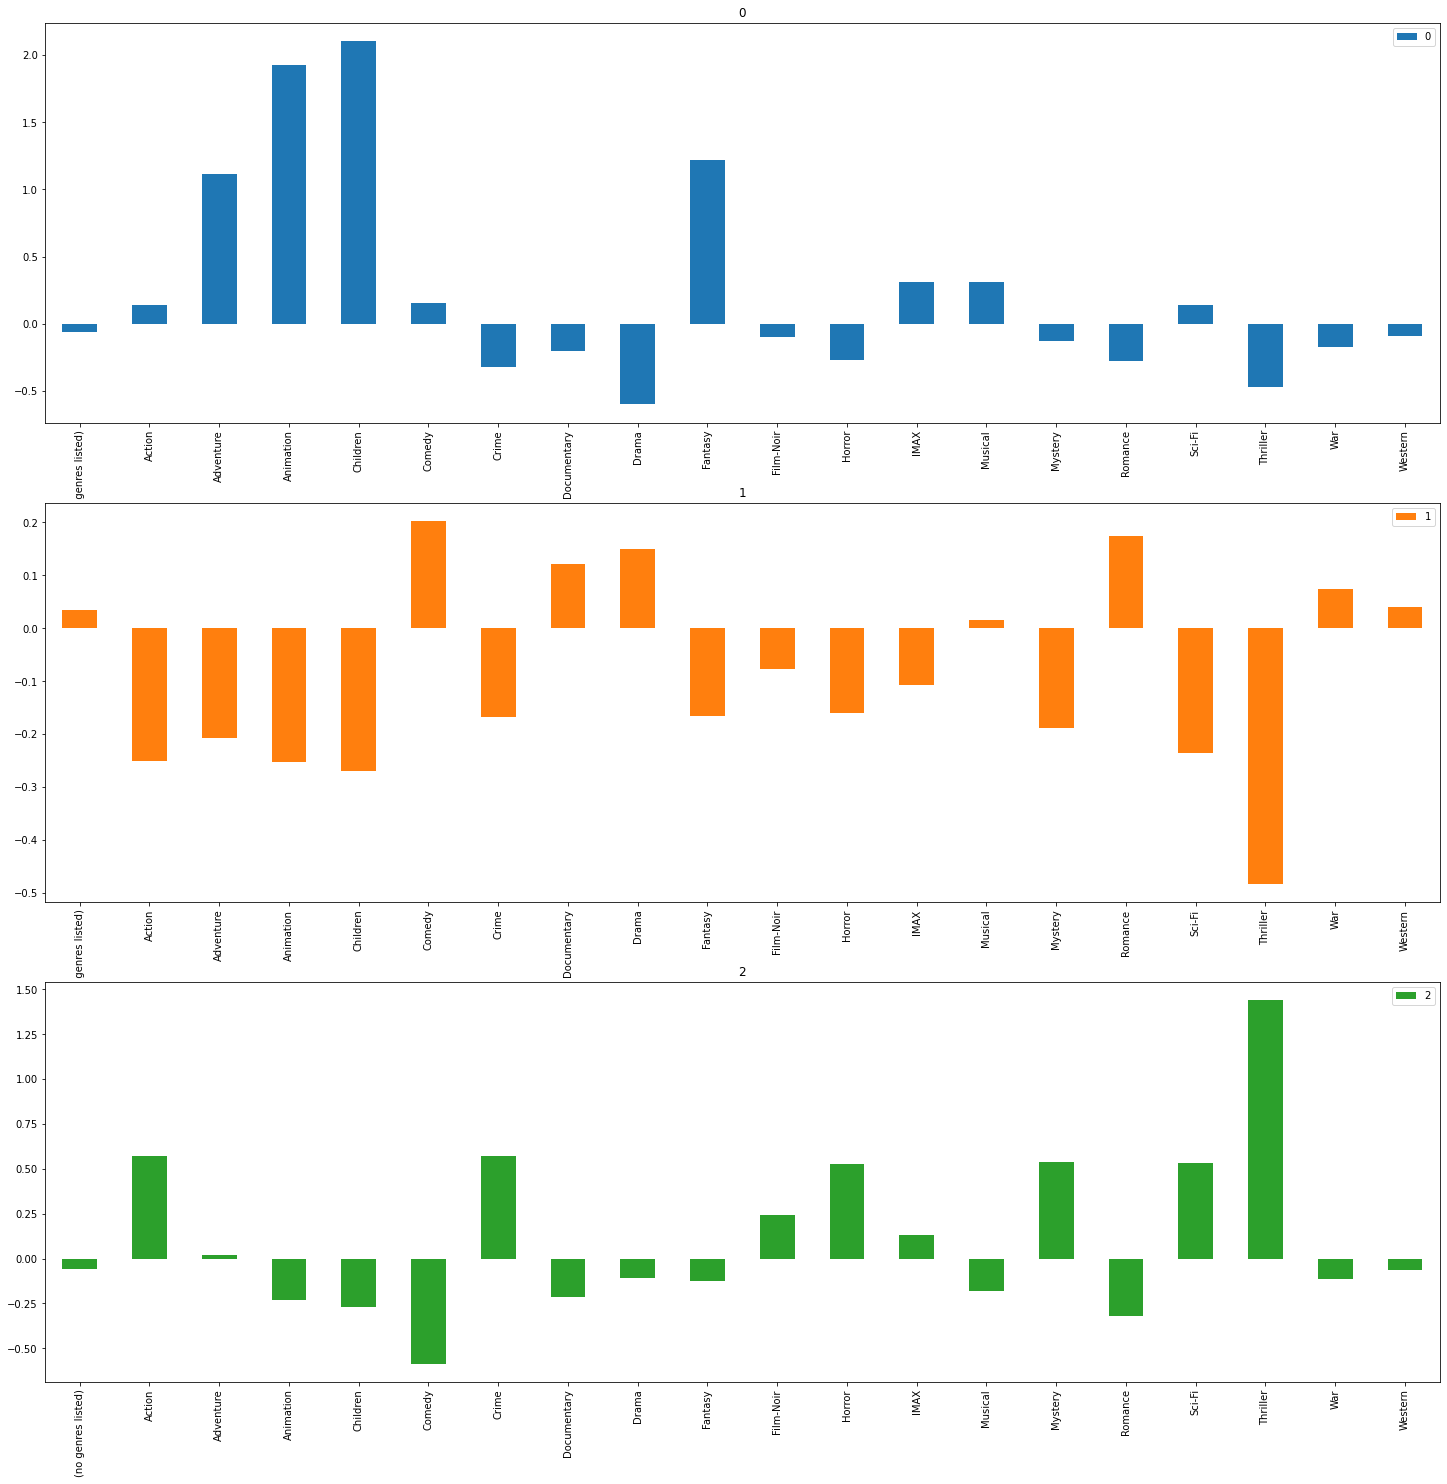

In [11]:
grupos.transpose().plot.bar(subplots=True, 
                figsize=(25, 25),
                sharex=False)

In [12]:
grupo = 0
filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filmes_id,titulos,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
8943,136503,Tom and Jerry: Shiver Me Whiskers (2006),Animation|Children|Comedy,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3154,4241,Pokémon 3: The Movie (2001),Animation|Children,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
332,374,Richie Rich (1994),Children|Comedy,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
527,616,"Aristocats, The (1970)",Animation|Children,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
273,314,"Secret of Roan Inish, The (1994)",Children|Drama|Fantasy|Mystery,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
1492,2017,Babes in Toyland (1961),Children|Fantasy|Musical,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
8985,138835,Return to Treasure Island (1988),Adventure|Animation|Comedy,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7654,88356,"Smurfs, The (2011)",Animation|Children|Comedy,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
349,393,Street Fighter (1994),Action|Adventure|Fantasy,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2160,2876,Thumbelina (1994),Animation|Children|Fantasy,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [13]:
from sklearn.manifold import TSNE

tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ -8.106984 , -35.130875 ],
       [-53.191113 ,  43.564907 ],
       [-24.072973 , -16.156496 ],
       ...,
       [-19.498407 ,  12.765674 ],
       [ 25.29451  ,  28.313663 ],
       [ 14.650722 ,  -6.8585773]], dtype=float32)

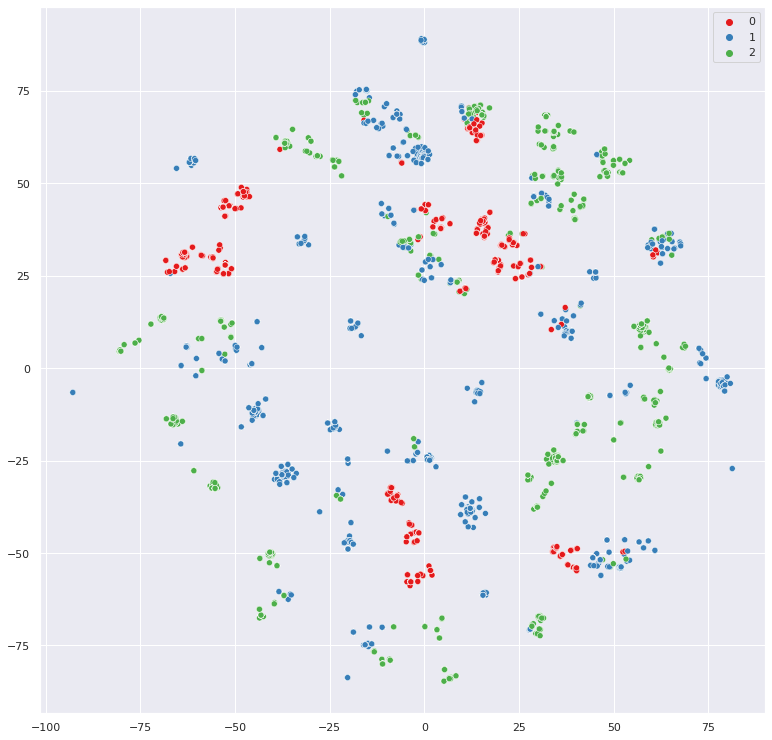

In [14]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13, 13)})

sns.scatterplot(x=visualizacao[:, 0],
                y=visualizacao[:, 1],
                hue=modelo.labels_,
                palette=sns.color_palette('Set1', 3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b8f54f438>,
      dtype=object)

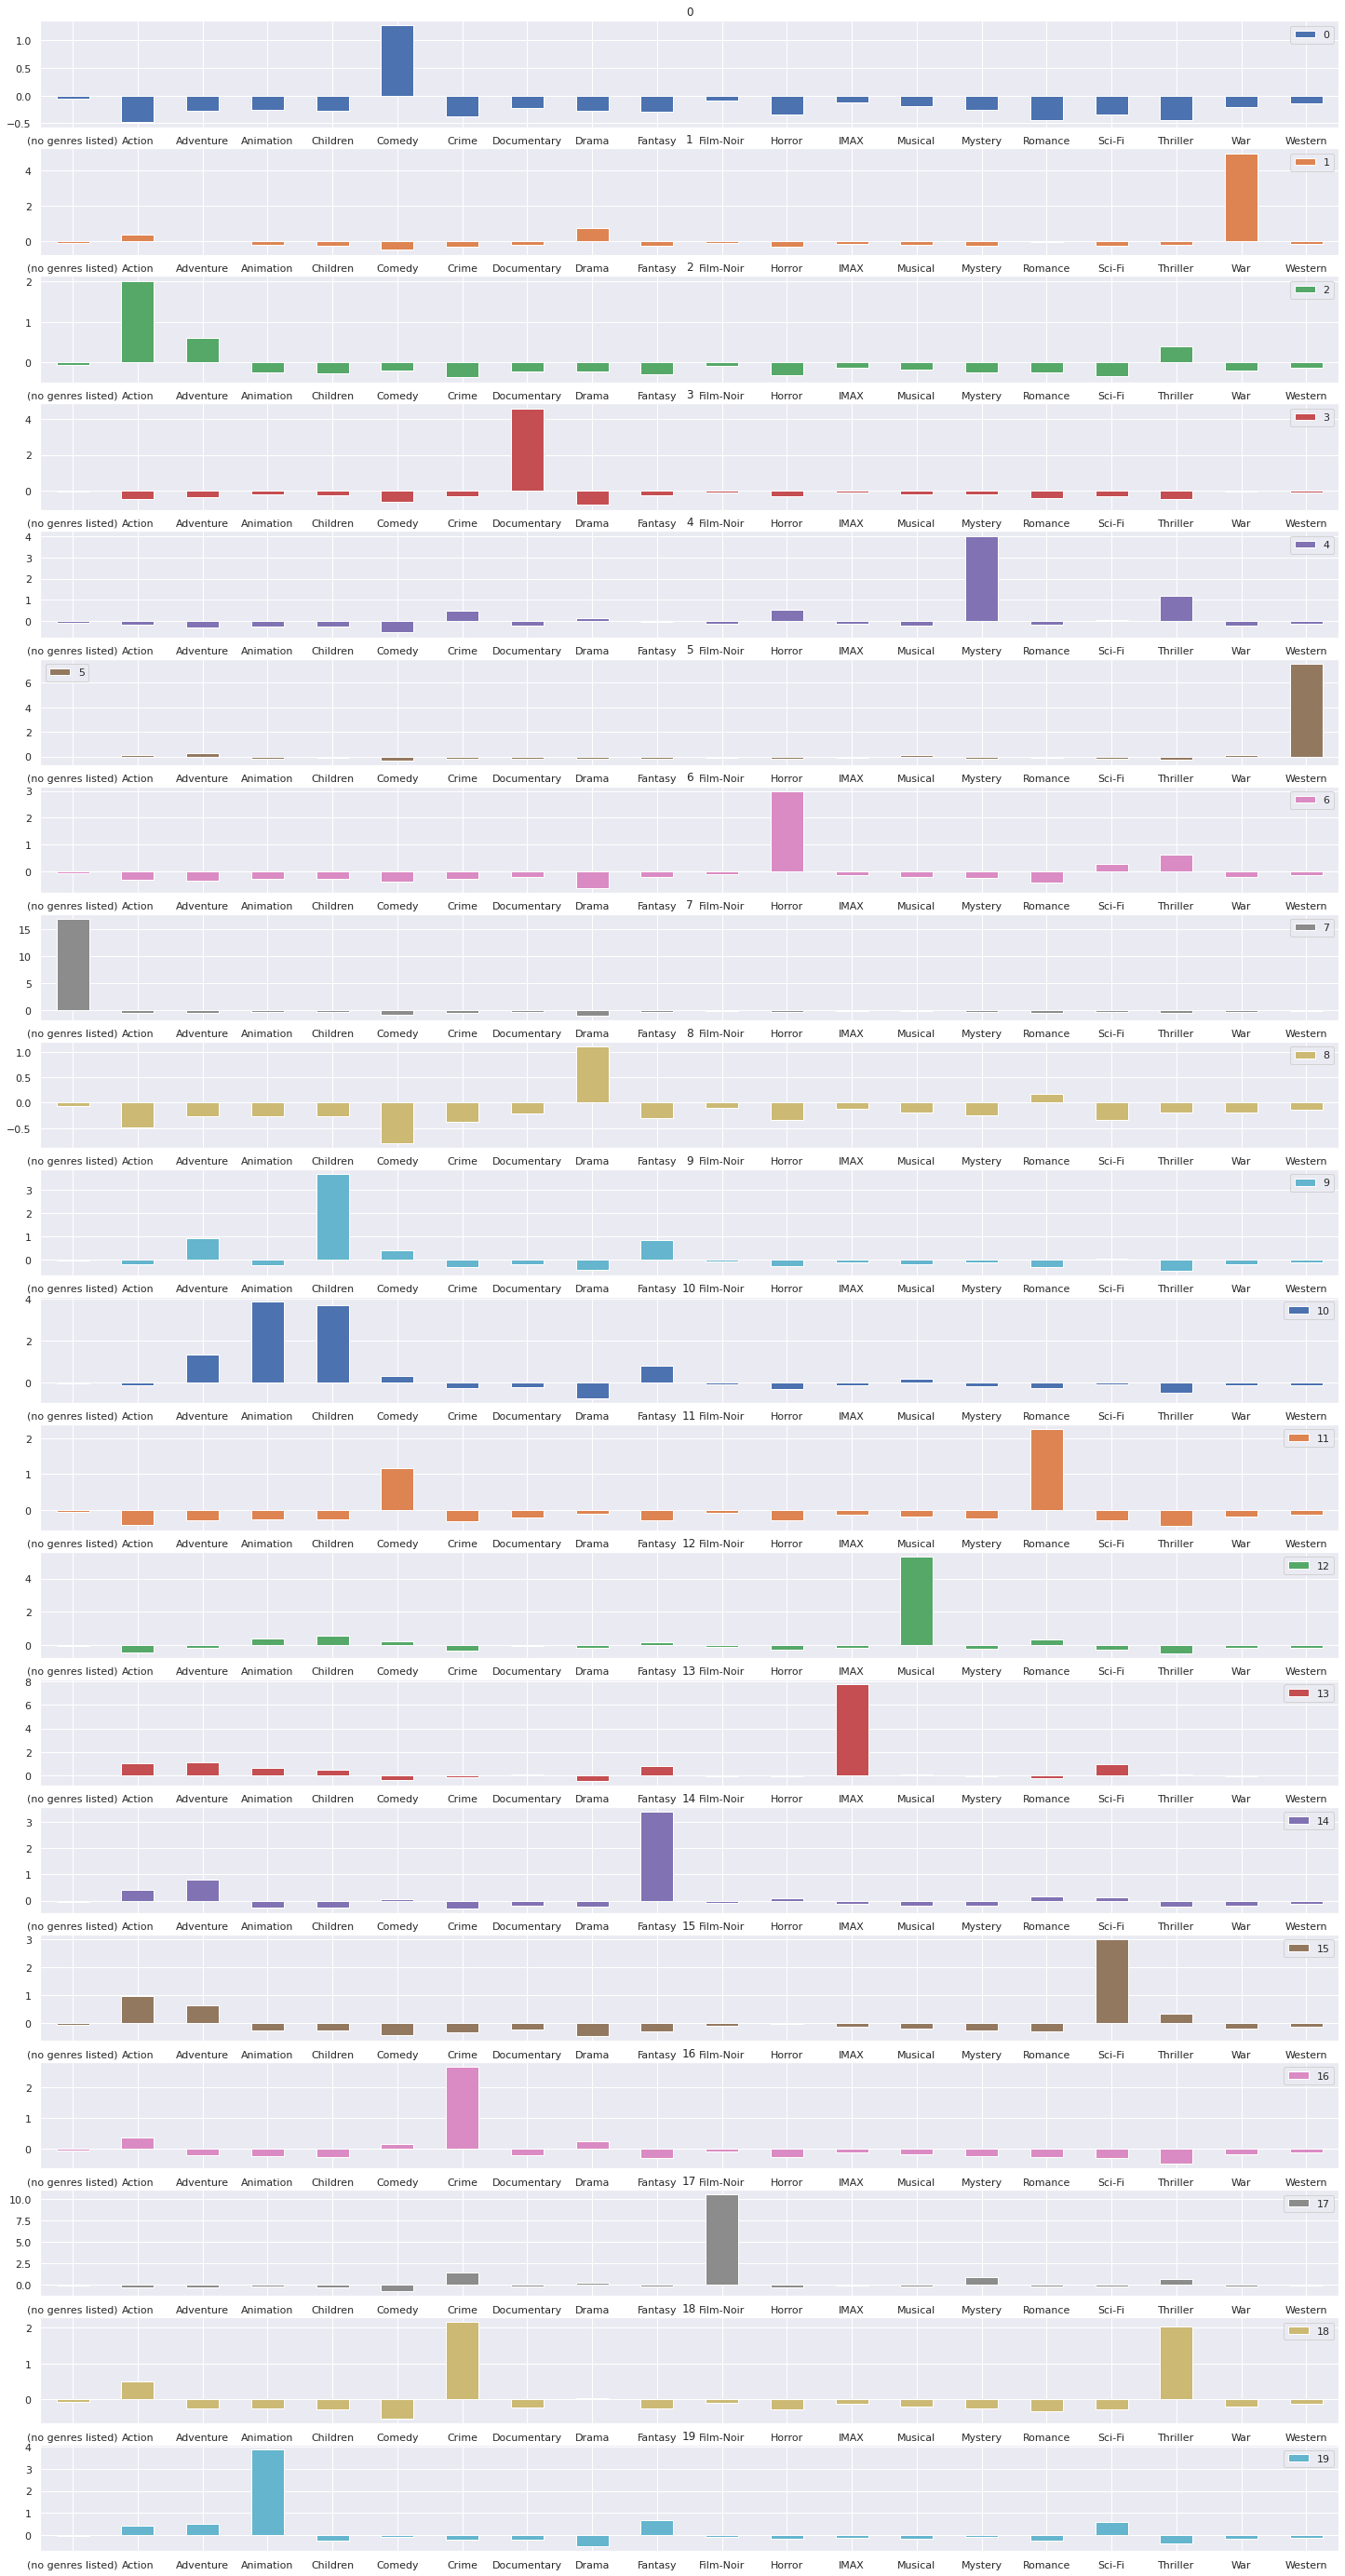

In [18]:
modelo = KMeans(n_clusters=20)

modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)

grupos.transpose().plot.bar(subplots=True, 
                figsize=(25, 50),
                sharex=False,
                rot=0)

In [20]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [22]:
kmeans(20, generos_escalados)

[20, 55215.01058004681]

In [23]:
kmeans(3, generos_escalados)

[3, 168063.22981380866]

In [25]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]
resultado

[[1, 194840.0],
 [2, 179484.10364334713],
 [3, 166406.05344153347],
 [4, 156785.99625726676],
 [5, 147333.27409190303],
 [6, 138729.4243852859],
 [7, 128926.1767243122],
 [8, 120969.70006596149],
 [9, 109800.98743534401],
 [10, 102131.38960079956],
 [11, 94544.61730004521],
 [12, 88880.23290489764],
 [13, 82099.56823029794],
 [14, 73143.62192102877],
 [15, 68737.99383887678],
 [16, 63743.45311468669],
 [17, 61806.28610400818],
 [18, 58933.66883340621],
 [19, 57682.91169567428],
 [20, 55759.24572463074],
 [21, 52735.410261755285],
 [22, 51743.44912758233],
 [23, 50527.848149317775],
 [24, 49240.39056454571],
 [25, 47858.95976087586],
 [26, 46880.31542088333],
 [27, 45827.015784965064],
 [28, 44870.861265804284],
 [29, 43916.638028856774],
 [30, 43492.645829292655],
 [31, 41730.72746441134],
 [32, 40972.494594319054],
 [33, 39737.25713334342],
 [34, 39401.79980716082],
 [35, 38848.55645948981],
 [36, 38536.22079482786],
 [37, 36936.994253512246],
 [38, 36591.097981496],
 [39, 35502.66535

In [29]:
resultado = pd.DataFrame(resultado, columns=['grupos', 'inertia'])

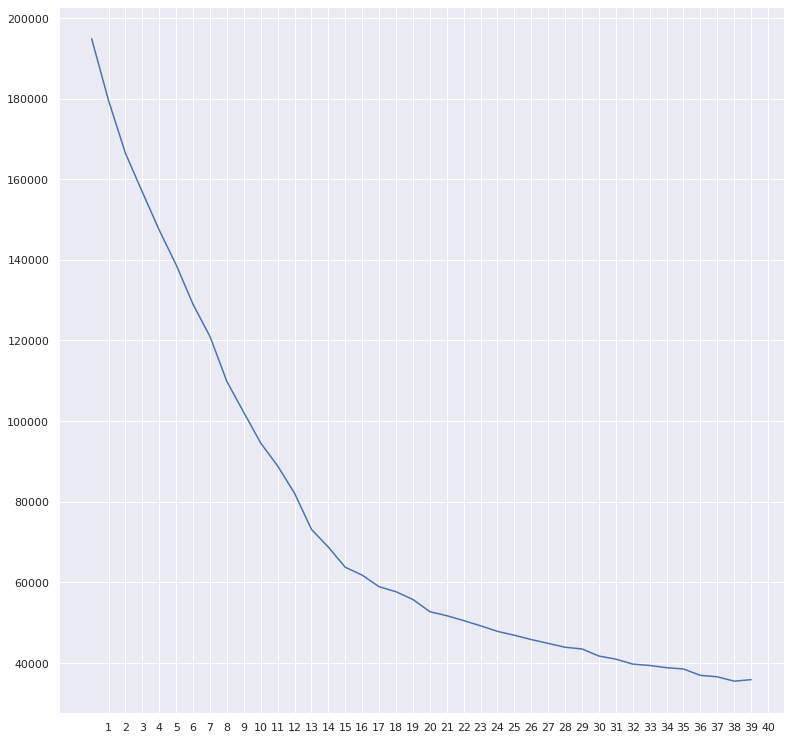

In [30]:
resultado.inertia.plot(xticks=resultado.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b86037e10>,
      dtype=object)

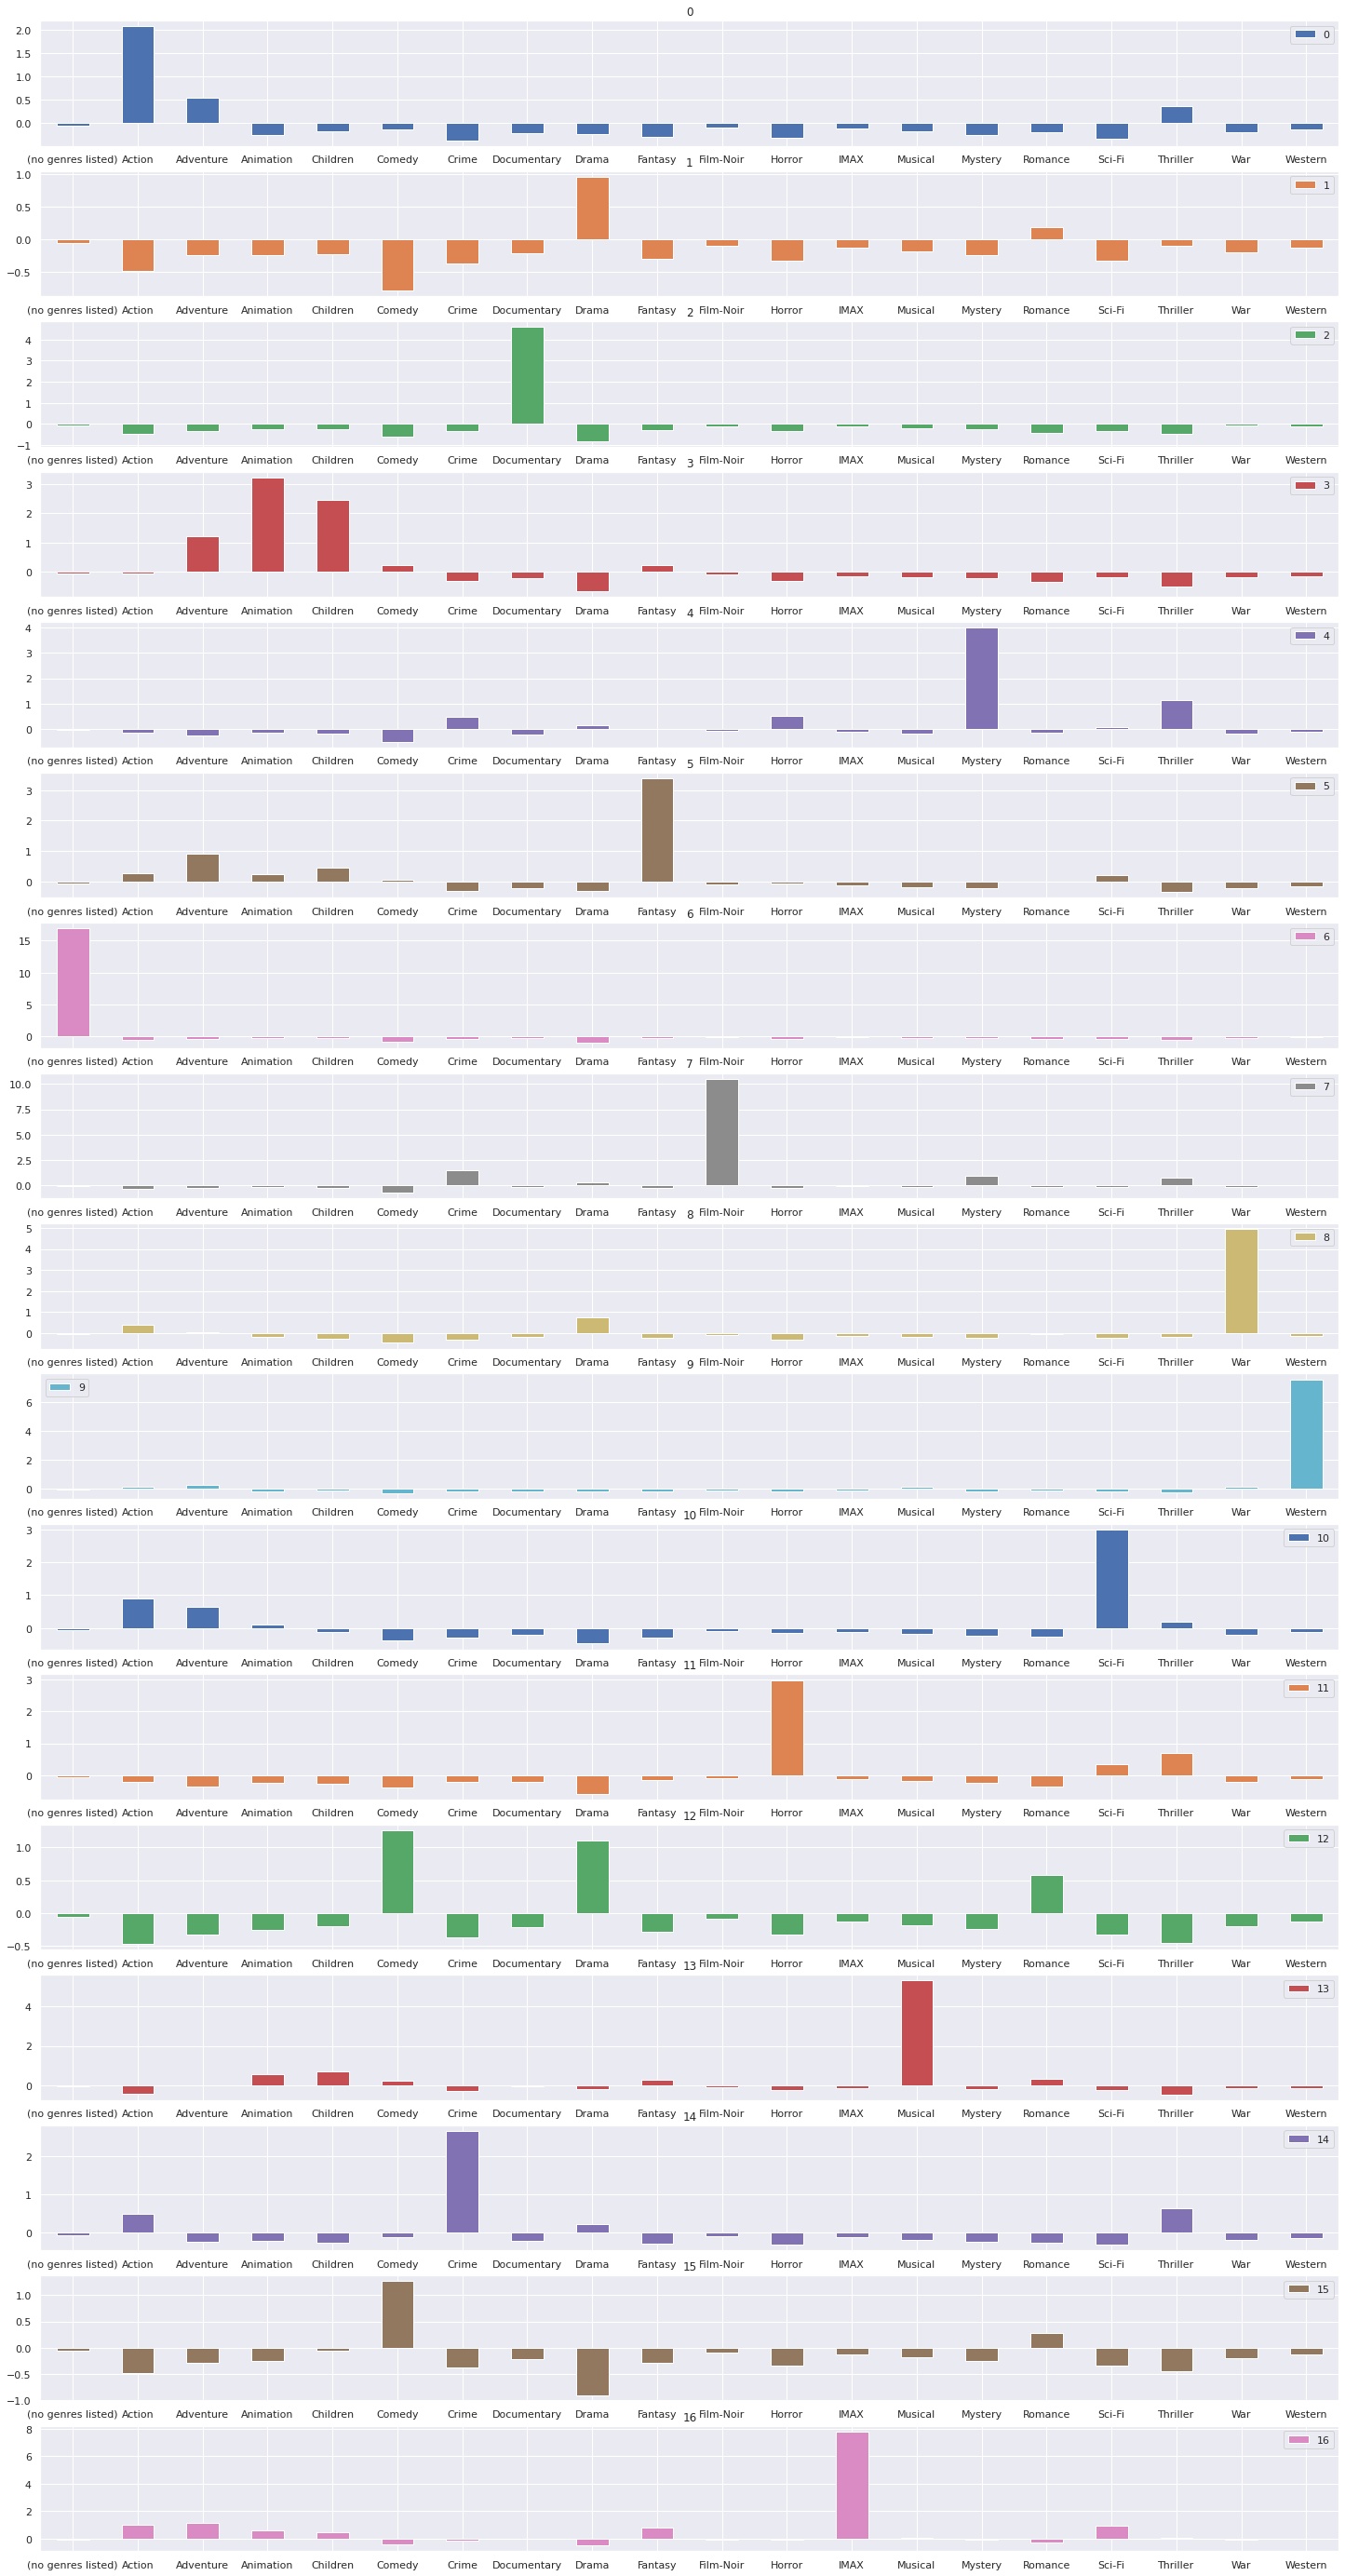

In [32]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)

grupos.transpose().plot.bar(subplots=True, 
                figsize=(25, 50),
                sharex=False,
                rot=0)

In [38]:
from sklearn.cluster import AgglomerativeClustering

modelo = AgglomerativeClustering(n_clusters=17)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [35]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 43.072968  ,  13.3624325 ],
       [-13.74762   , -28.764456  ],
       [  0.90304446, -19.355764  ],
       ...,
       [ 10.225779  ,  10.865482  ],
       [ 40.644196  ,  32.29218   ],
       [-28.303648  ,  -5.6921663 ]], dtype=float32)

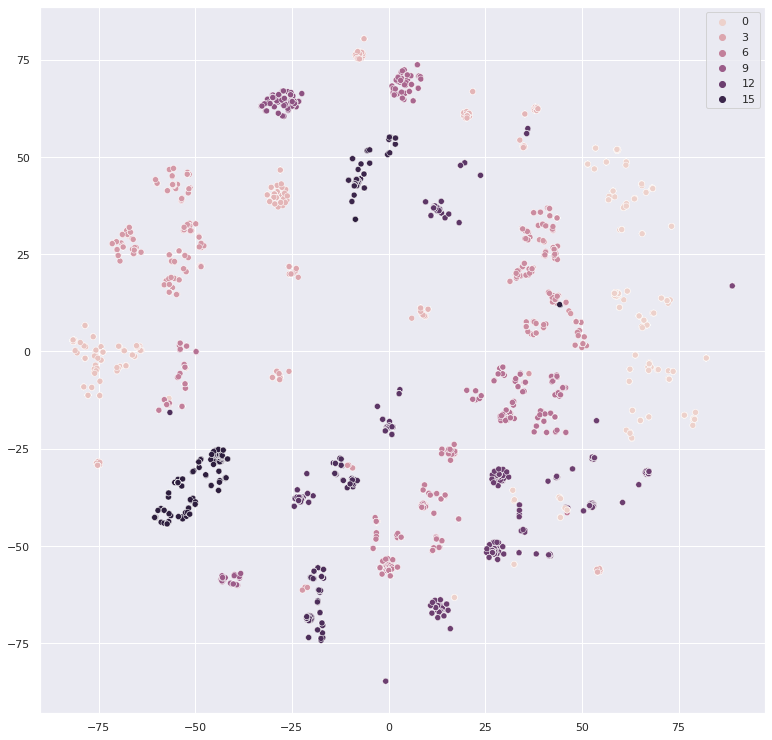

In [39]:
sns.scatterplot(x=visualizacao[:, 0],
                y=visualizacao[:, 1],
                hue=grupos)

In [40]:
from scipy.cluster.hierarchy import dendrogram, linkage

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b85276940>,
      dtype=object)

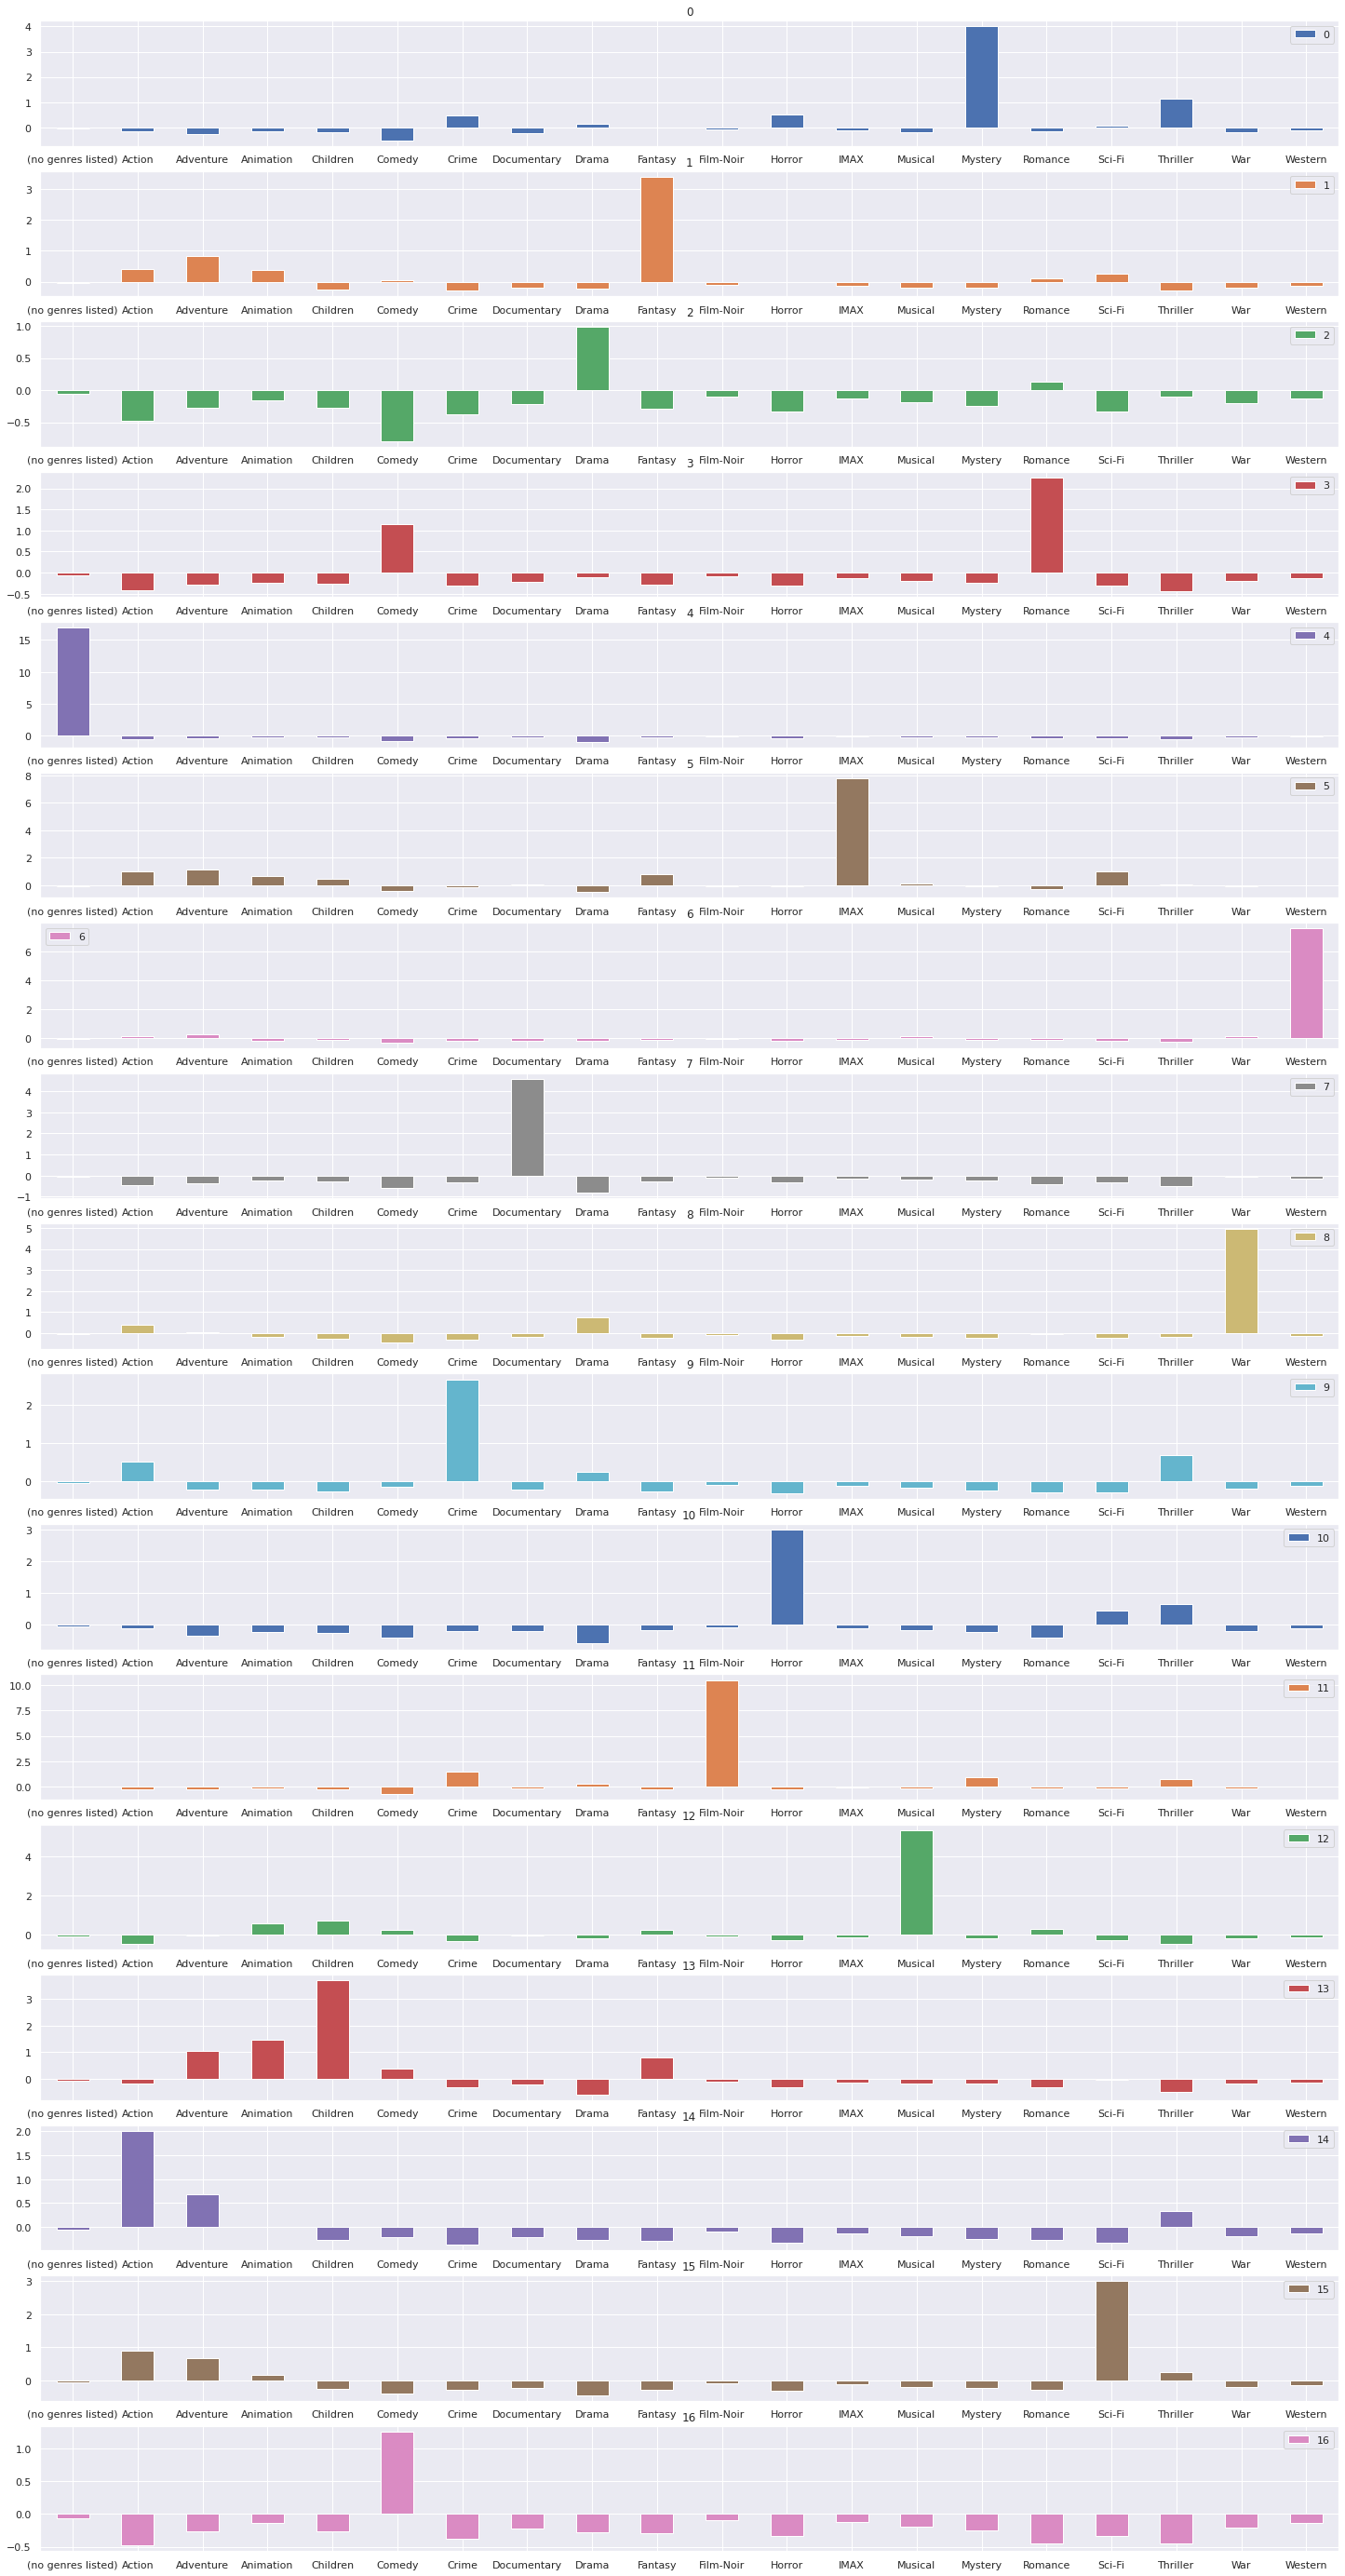

In [41]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)

grupos.transpose().plot.bar(subplots=True, 
                figsize=(25, 50),
                sharex=False,
                rot=0)

In [43]:
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 2.        , 16.        ,  2.50576203,  2.        ],
       [ 3.        , 17.        ,  2.71265276,  3.        ],
       [14.        , 18.        ,  3.06130984,  4.        ],
       [ 9.        , 19.        ,  3.46877737,  5.        ],
       [15.        , 20.        ,  3.52181579,  6.        ],
       [10.        , 21.        ,  3.91864373,  7.        ],
       [ 1.        , 22.        ,  4.16837935,  8.        ],
       [13.        , 23.        ,  4.72307799,  9.        ],
       [ 0.        , 24.        ,  4.72390131, 10.        ],
       [ 7.        , 25.        ,  5.18889127, 11.        ],
       [ 8.        , 26.        ,  5.25796016, 12.        ],
       [12.        , 27.        ,  5.80733892, 13.        ],
       [ 6.        , 28.        ,  7.87519975, 14.        ],
       [ 5.        , 29.        ,  8.25605373, 15.        ],
       [11.        , 30.        , 10.81567055, 16.        ],
       [ 4.        , 31.        , 17.07589   , 17.        ]])

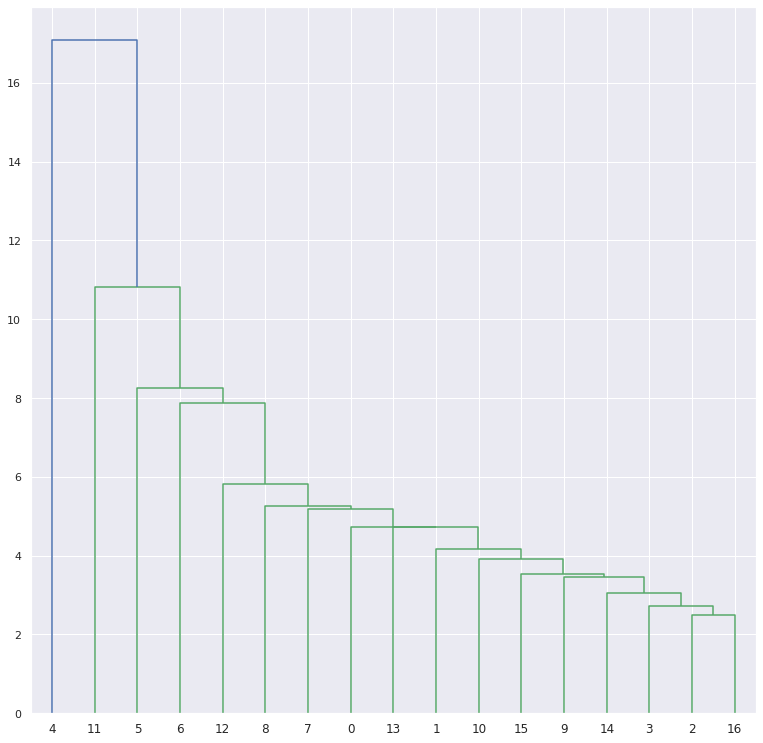

In [44]:
dendrogram = dendrogram(matriz_de_distancia)